## Lidando com muitas dimenções



### Dados com muitas dimenções

#### `Problema na classificação`

In [1]:
import pandas as pd

df = pd.read_csv('./exames.csv')
df.head()

/home/ike/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
df.isna().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

# Retirando colua 'exame_33' por ter dados nulos
df.drop(columns=['exame_33'], inplace=True)
### Separação do modelo
X = df.drop(columns=['id', 'diagnostico'])
y = df.diagnostico

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(X_train, y_train)
print(f'Resultado da classificação RF {(classificador.score(X_test, y_test)* 100):.2f}%')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Resultado da classificação RF 92.40%


In [4]:
# Rodando Dummy
from sklearn.dummy import DummyClassifier

classificador_bobo = DummyClassifier(strategy = "most_frequent")
classificador_bobo.fit(X_train, y_train)
print(f'Resultado da classificação Dummy {(classificador_bobo.score(X_test, y_test)*100):.2f}%')

Resultado da classificação Dummy 66.67%


### Avançando na Exploração de Dados

#### Construindo uma vizualização

In [5]:
dados_plot = pd.concat([y, X.iloc[:,0:10]], axis = 1)

dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")
dados_plot.head()


,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

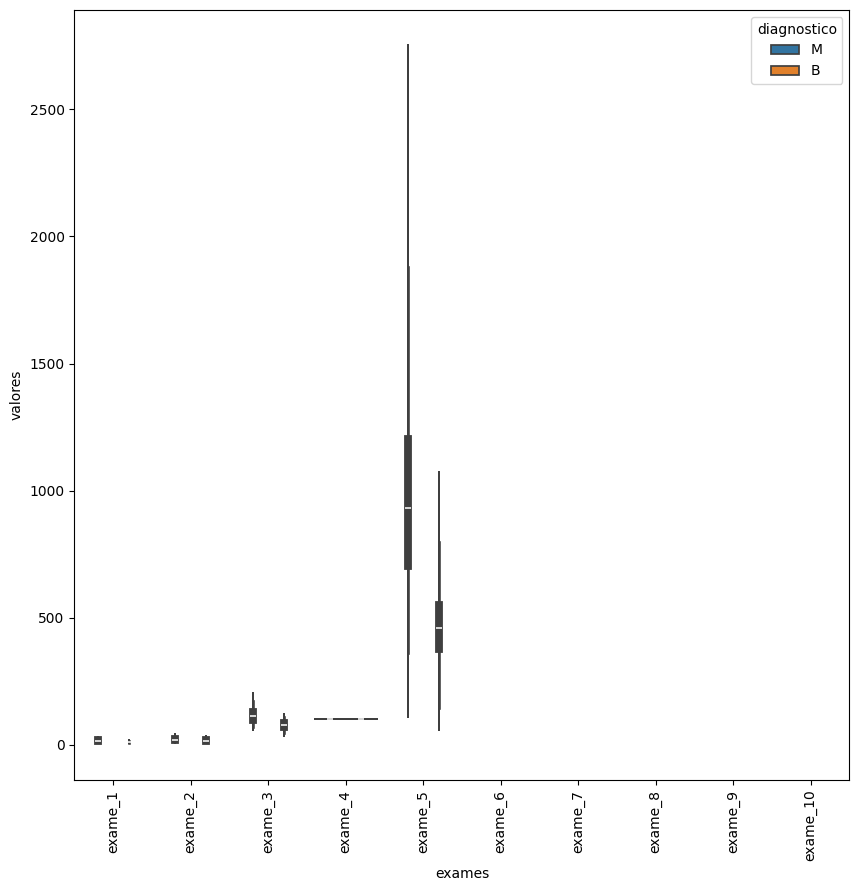

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

dados_plot = pd.concat([y, X.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")
plt.figure(figsize=(10,10))
sns.violinplot(x = 'exames', y= 'valores',
               hue = 'diagnostico',data = dados_plot)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

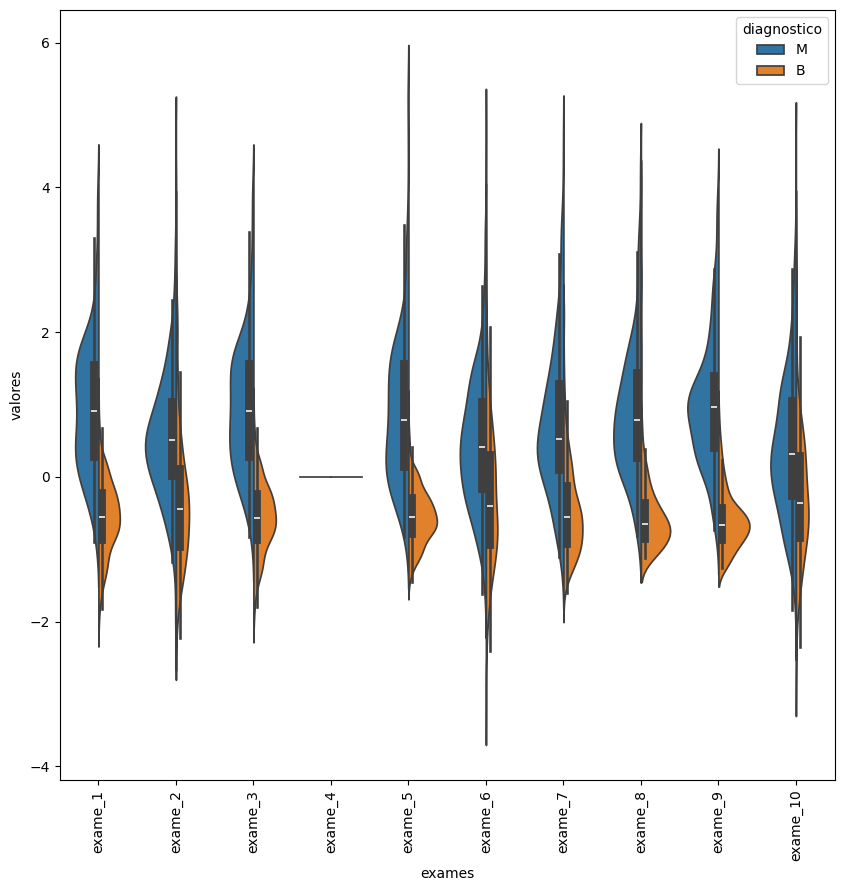

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

valores = X.copy()

padronizador = StandardScaler()
padronizador.fit(valores)
valores_padronizados = padronizador.transform(valores)
valores_padronizados = pd.DataFrame(data= valores_padronizados,
                                    columns= X.keys())

dados_plot = pd.concat([y, valores_padronizados.iloc[:,0:10]], axis = 1)

dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

plt.figure(figsize=(10,10))
sns.violinplot(x = 'exames', y= 'valores',
               hue = 'diagnostico',data = dados_plot,
               split= True)
plt.xticks(rotation = 90)

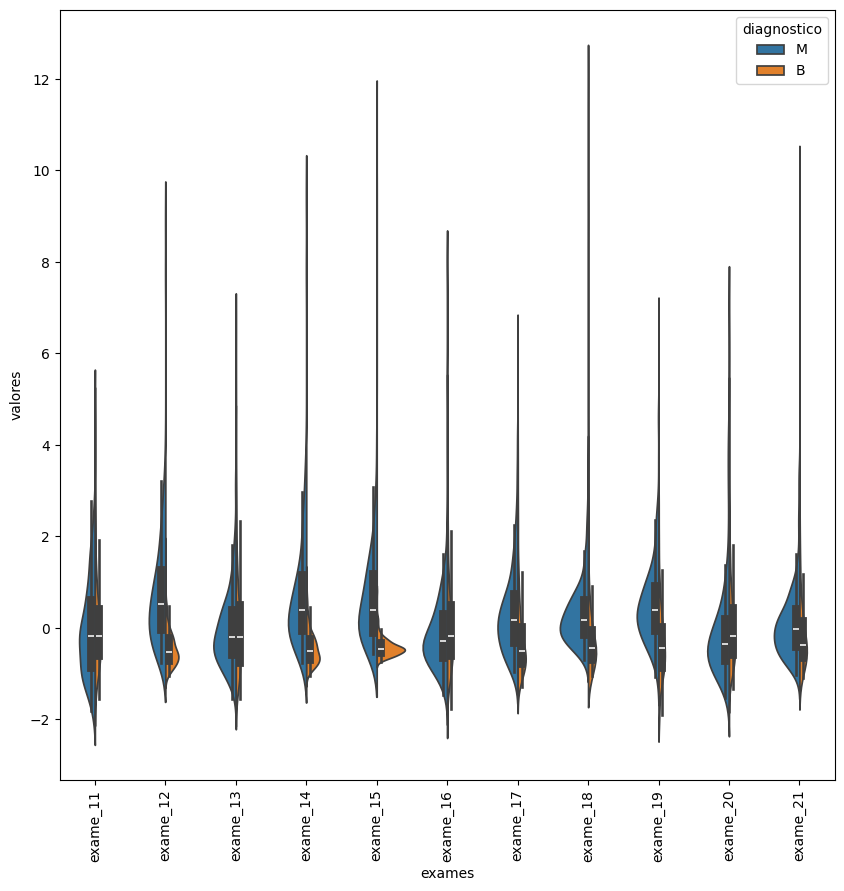

In [8]:
def grafico_violino(valores, inicio, fim):

     dados_plot = pd.concat([y, valores.iloc[:,inicio:fim]], axis = 1)

     dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                      var_name="exames",
                      value_name="valores")

     plt.figure(figsize=(10,10))
     sns.violinplot(x = 'exames', y= 'valores',
                    hue = 'diagnostico',data = dados_plot,
                    split= True)
     plt.xticks(rotation = 90)
     
grafico_violino(valores_padronizados, 10,21)


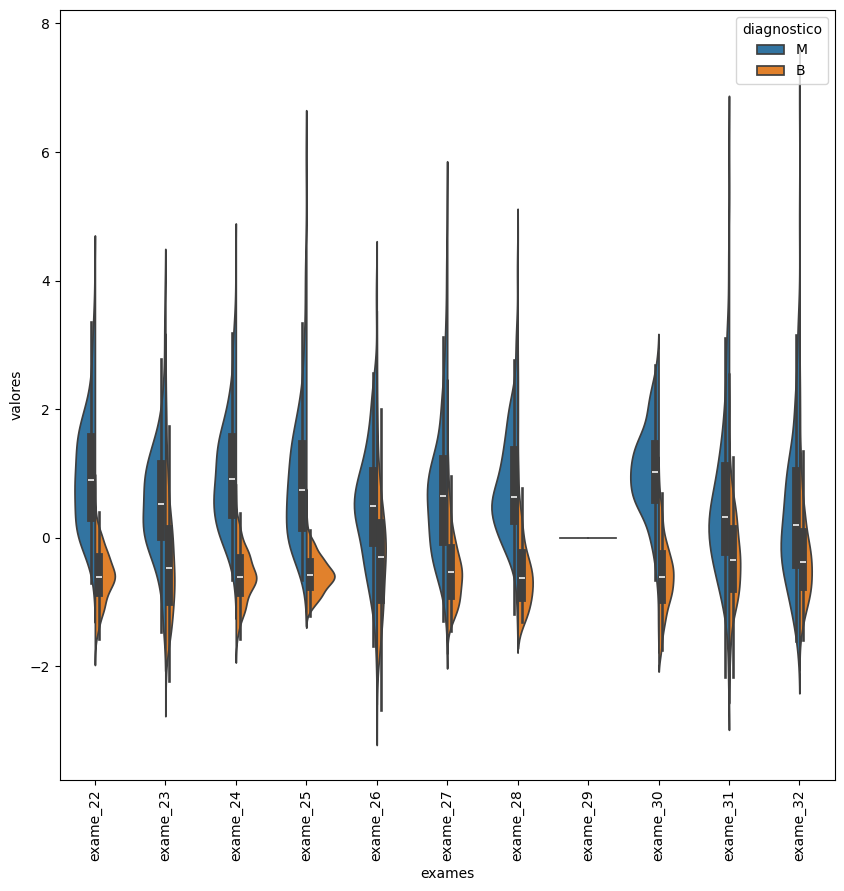

In [9]:
grafico_violino(valores_padronizados, 21,32)

In [10]:
valores_drop1 = valores_padronizados.drop(columns=['exame_29', 'exame_4'])

def classificador(J):
     SEED = 123143
     random.seed(SEED)
     X_train, X_test, y_train, y_test = train_test_split(J,
                                                         y,
                                                         test_size = 0.3)

     classificador = RandomForestClassifier(n_estimators = 100)
     classificador.fit(X_train, y_train)
     print(f'Resultado da classificação RF {(classificador.score(X_test, y_test)* 100):.2f}%')

classificador(valores_drop1)

Resultado da classificação RF 91.81%


### Dados Correlacionados

#### `Matriz de Correlação`

<Axes: >

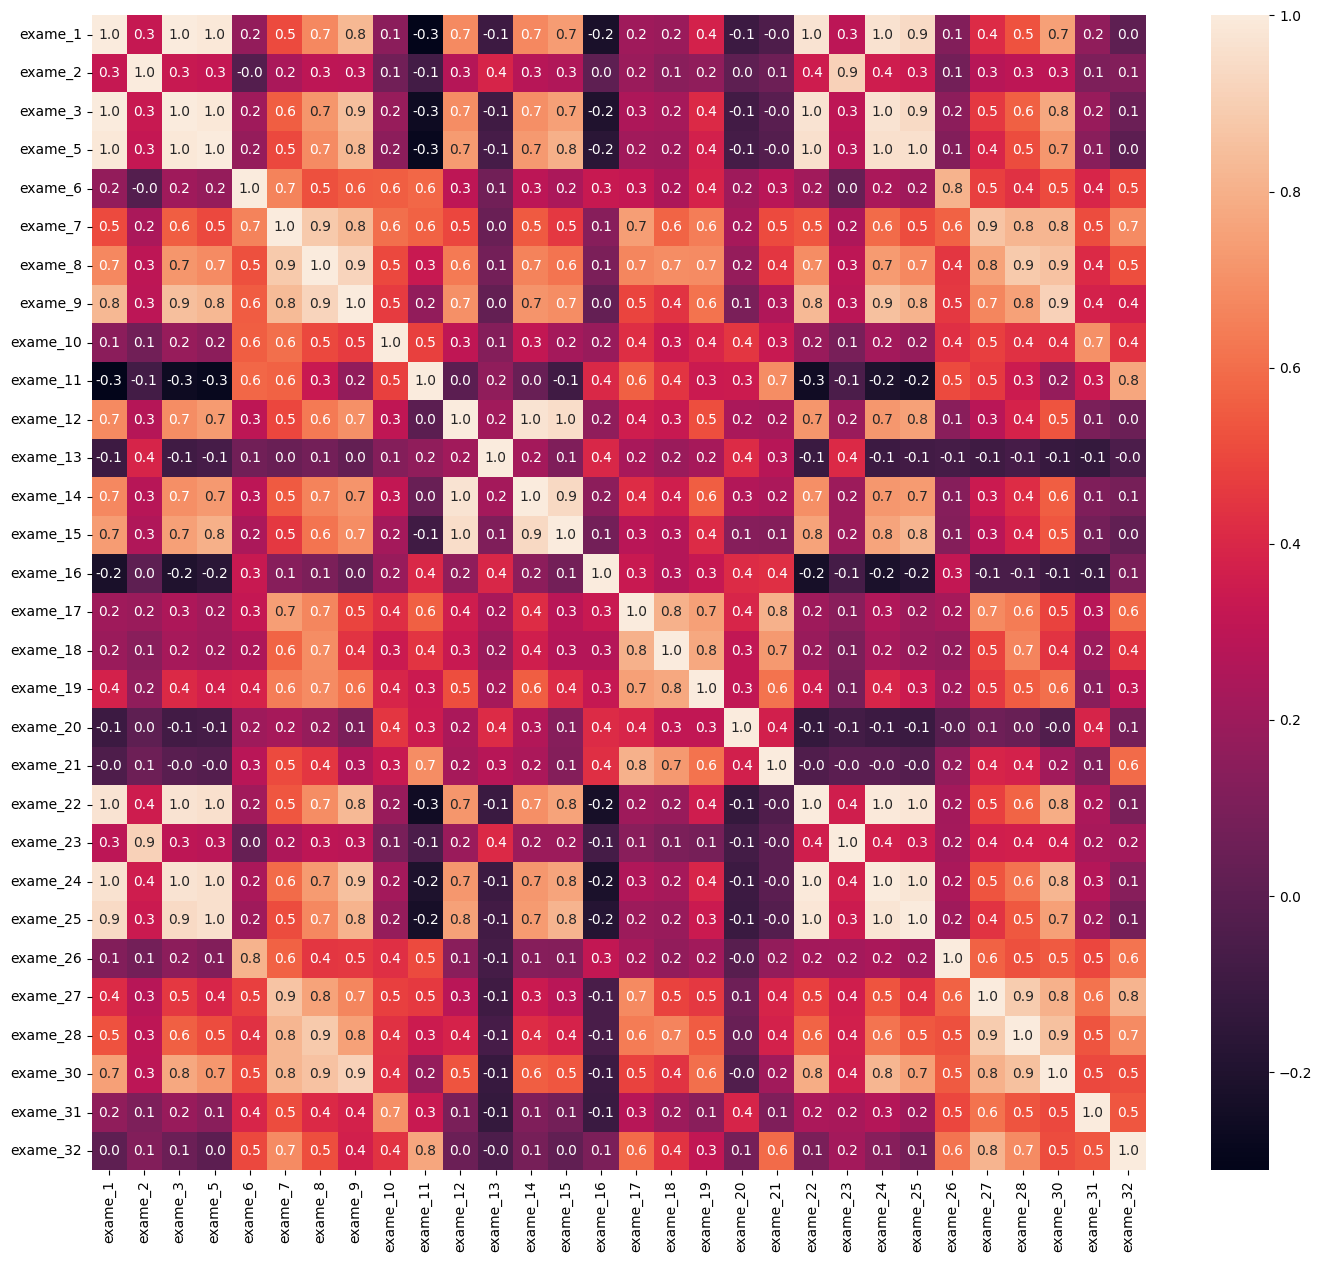

In [11]:
# Verificando a correlação
matriz_corr = valores_drop1.corr()
plt.figure(figsize=(17,15))
sns.heatmap(matriz_corr, annot = True, fmt = ".1f")

In [12]:
# Varificando quem tam a corr maior que 0.99
matriz_corr_v1 =  matriz_corr[matriz_corr>0.99]
matriz_corr_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Melhorando a vizualização e ver quais variaveis estaão acima de 1
matriz_corr_v2 = matriz_corr_v1.sum()
variaveis_corr = matriz_corr_v2[matriz_corr_v2>1]
variaveis_corr

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [14]:
# Retirando e testando o score do modelo
valores_drop2 = valores_drop1.drop(columns=variaveis_corr.keys())
classificador(valores_drop2)

Resultado da classificação RF 93.57%


In [15]:
# Retirando apenas 2 variaveis para testar
valores_drop3 = valores_drop1.drop(columns=['exame_3', 'exame_24'])
classificador(valores_drop3)

Resultado da classificação RF 92.98%


### Automatizando a seleção

#### `Select K best`

In [16]:
# Quais as melhors features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Instanciand o modelo com chi2
selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [17]:
# Arrumar valores negativos
valores_drop4 = X.drop(columns=(['exame_4', 'exame_29', 'exame_3', 'exame_24'])).copy()

In [18]:
SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_drop4, y,
                                                    test_size = 0.3)
selecionar_kmelhores.fit(X_train, y_train)
treino_kbest = selecionar_kmelhores.transform(X_train)
test_kbest = selecionar_kmelhores.transform(X_test)

In [19]:
treino_kbest.shape

(398, 5)

In [20]:
classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_kbest, y_train)
print(f'Resultado da classificação RF {(classificador.score(test_kbest, y_test)*100):.2f}%')

Resultado da classificação RF 92.40%


#### `Matriz de confunsão`


In [21]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, classificador.predict(test_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, 58.7222222222222, 'Predição'),
 Text(58.222222222222214, 0.5, 'Real')]

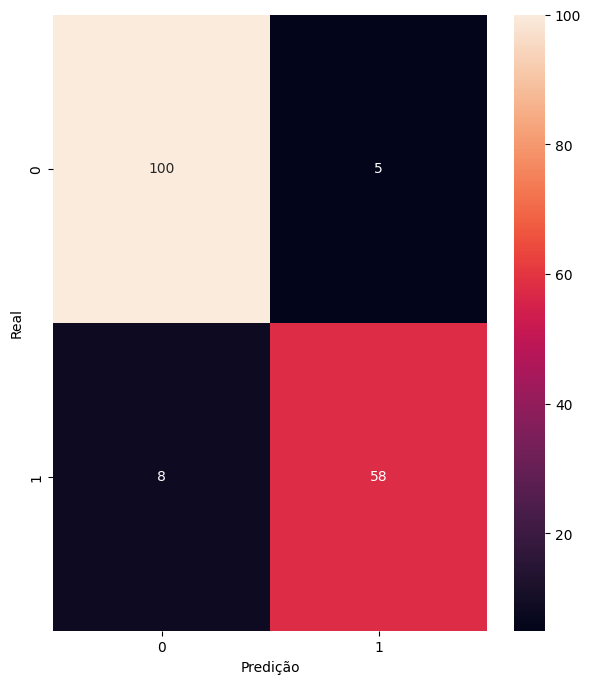

In [22]:
plt.figure(figsize = (7, 8))
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

#### `Seleção com RFE`


Resultado da classificação 90.06%


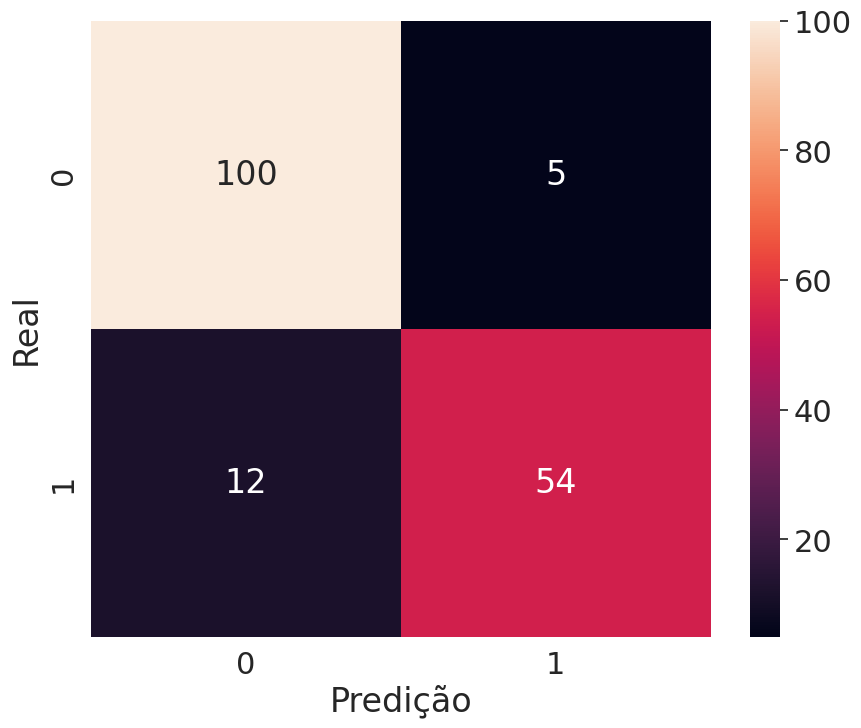

In [23]:
from sklearn.feature_selection import RFE

# Seed
SEED = 1234
random.seed(SEED)

# Splits
X_train, X_test, y_train, y_test = train_test_split(valores_drop4, y,
                                                    test_size = 0.3)

# Classificador RF
classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_kbest, y_train)

# Método RFE
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)

# Transformação
selecionador_rfe.fit( X_train,y_train)
treino_rfe = selecionador_rfe.transform(X_train)
teste_rfe = selecionador_rfe.transform(X_test)

# Rodando modelo
classificador.fit(treino_rfe, y_train)

# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, classificador.predict(teste_rfe))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, y_test)* 100))

### Vizualizando os dados no plano

#### `Seleção com RFECV`

Resultado da classificação 92.98%


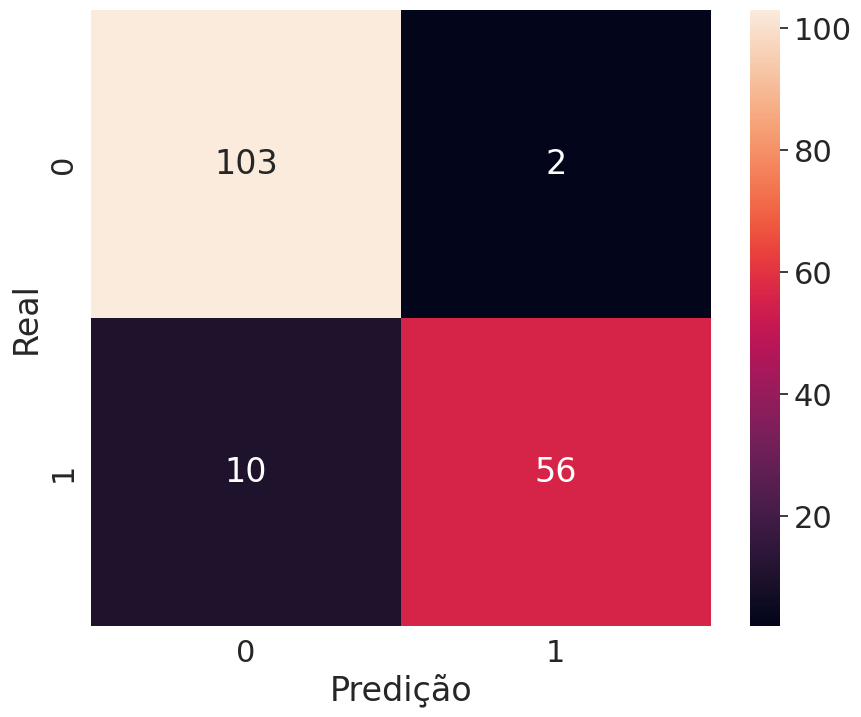

In [24]:
# RFE Crossvalidation
from sklearn.feature_selection import RFECV

# Seed
SEED = 1234
random.seed(SEED)

# Splits
X_train, X_test, y_train, y_test = train_test_split(valores_drop4, y,
                                                    test_size = 0.3)

# Classificador RF
classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_kbest, y_train)

# Método RFE
selecionador_rfecv = RFECV(estimator = classificador,   cv = 5, step = 1, scoring='accuracy')

# Transformação
selecionador_rfecv.fit( X_train,y_train)
treino_rfecv = selecionador_rfecv.transform(X_train)
teste_rfecv = selecionador_rfecv.transform(X_test)

# Rodando modelo
classificador.fit(treino_rfecv, y_train)

# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, classificador.predict(teste_rfecv))

plt.figure(figsize = (10, 8))
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, y_test)* 100))

In [25]:
### Verificando quais as features escolhidas
X_train.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [26]:
selecionador_rfecv.cv_results_['mean_test_score']

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

<function matplotlib.pyplot.show(close=None, block=None)>

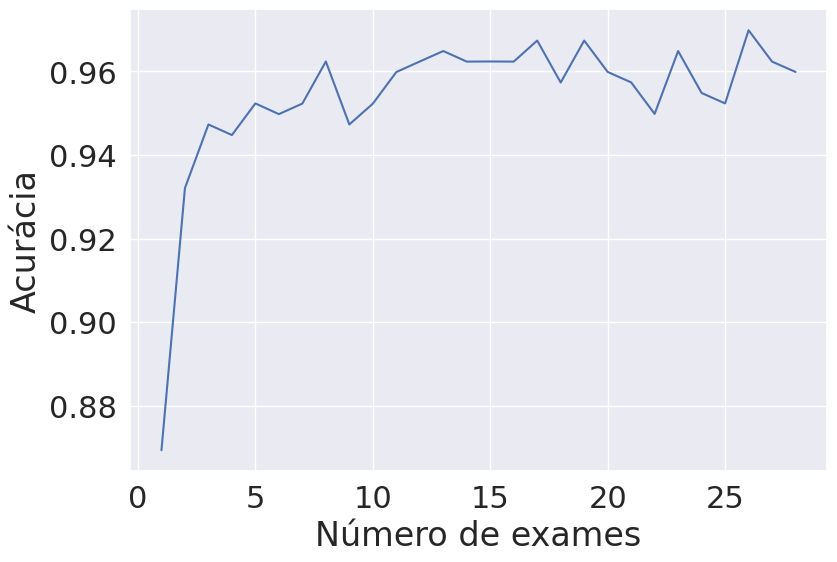

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

#### `Vizualizando dados no plano`

Resultado da classificação 87.13%


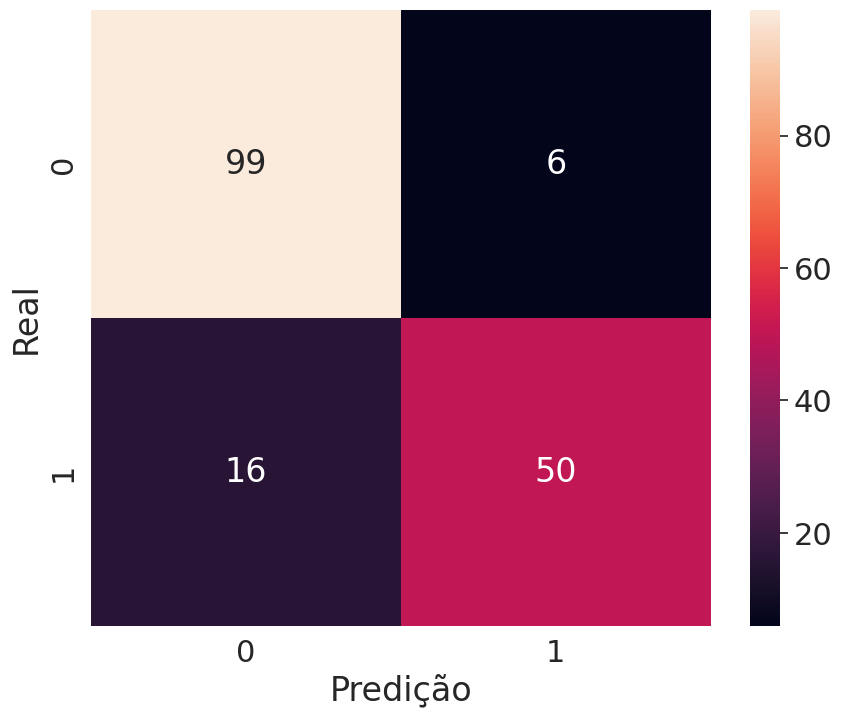

In [28]:
from sklearn.feature_selection import RFE

# Seed
SEED = 1234
random.seed(SEED)

# Splits
X_train, X_test, y_train, y_test = train_test_split(valores_drop4, y,
                                                    test_size = 0.3)

# Classificador RF
classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_kbest, y_train)

# Método RFE
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)

# Transformação
selecionador_rfe.fit( X_train,y_train)
treino_rfe = selecionador_rfe.transform(X_train)
teste_rfe = selecionador_rfe.transform(X_test)

# Rodando modelo
classificador.fit(treino_rfe, y_train)

# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, classificador.predict(teste_rfe))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, y_test)* 100))

In [29]:
valores_drop5 = selecionador_rfe.transform(valores_drop4)
valores_drop5.shape

(569, 2)

<Axes: >

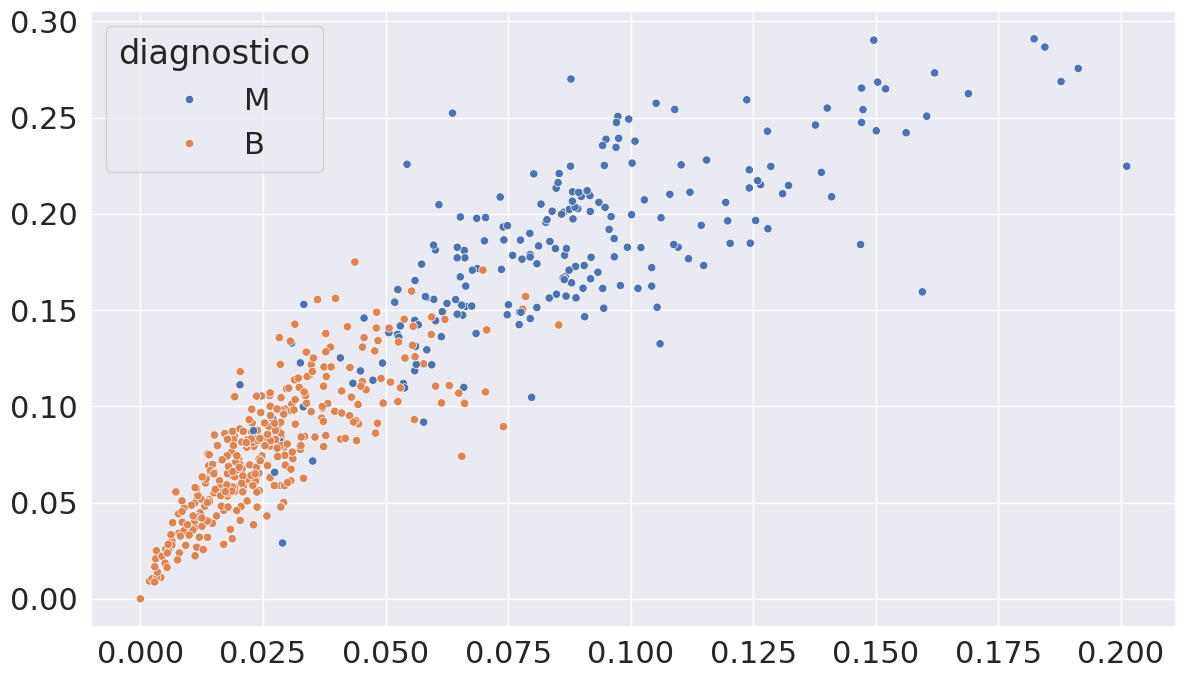

In [30]:
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_drop5[:,0], y = valores_drop5[:,1], hue = y)

#### `PCA`

<Axes: >

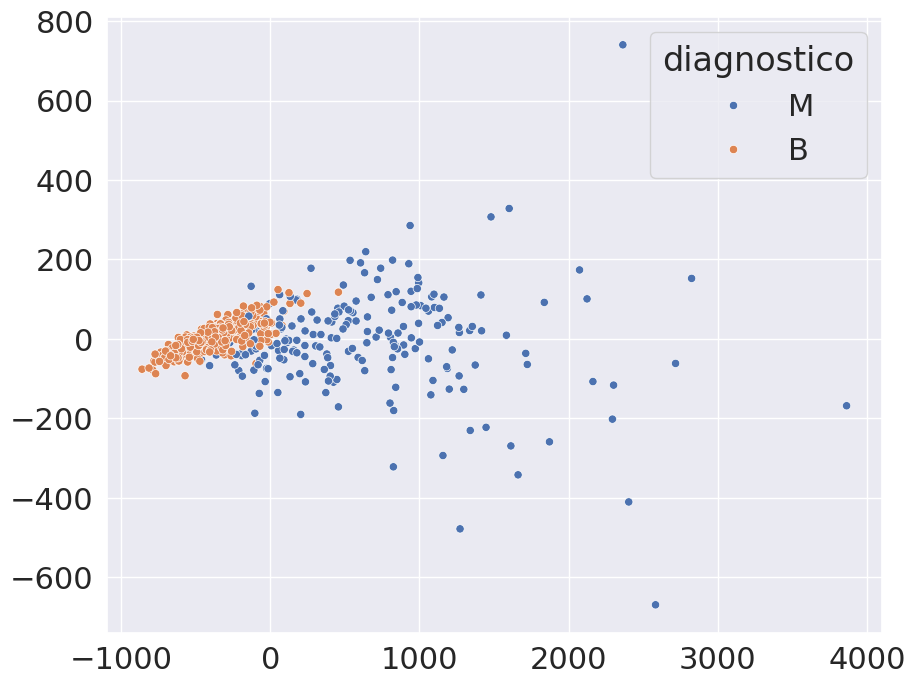

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_drop6 = pca.fit_transform(valores_drop4)
plt.figure(figsize=(10,8))
sns.scatterplot(x = valores_drop6[:,0], y = valores_drop6[:,1], hue = y)

<Axes: >

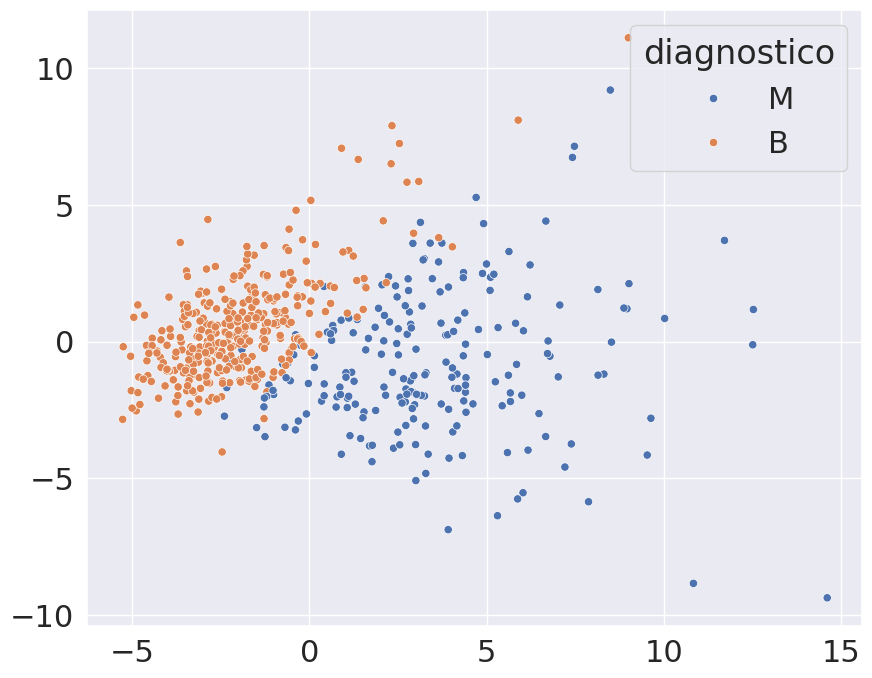

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_drop6 = pca.fit_transform(valores_drop3)
plt.figure(figsize=(10,8))
sns.scatterplot(x = valores_drop6[:,0], y = valores_drop6[:,1], hue = y)

Nota-se que o PCA possui uma melhor aplicação com conjuntos de dados que não possuem grande discrepancia, ou seja, normalizados

#### `TSNE`

<Axes: >

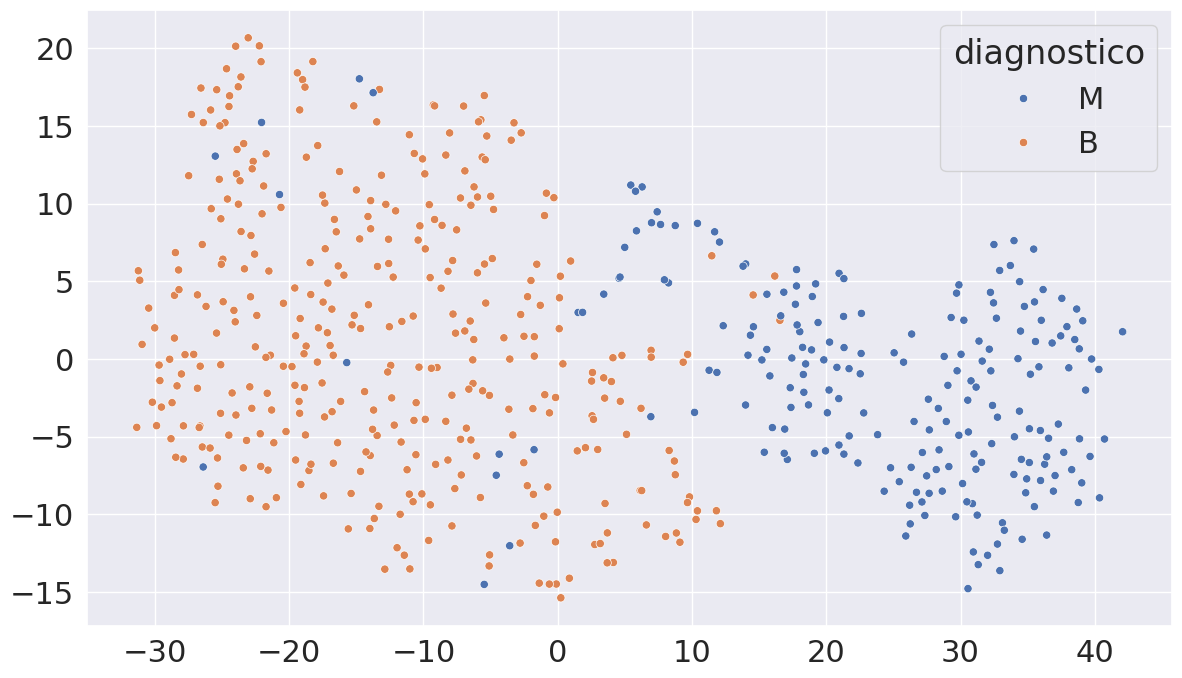

In [40]:
# Mantem a distancia entre os pontos de forma proporcioanl
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_drop7 = tsne.fit_transform(valores_drop3)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_drop7[:,0], y = valores_drop7[:,1], hue = y)

##### Sobre Redução de Dimencionalidade:
* Seleção de feature é uma alpicação de filto
* Redução de dimencionaliade há uma transformação nos dados e a partir dai seleciona os dados diminuindo a dimencionalidade

Ao se utilizar as técnicas de seleção de feature para gerar uma visualização no plano, é preciso escolher dois dos atributos para representar os dados. Manter apenas dois dos diversos atributos, faz com que um grande número de informação seja perdida, resultado em visualizações que podem induzir à conclusões equivocadas.O ideal é a escolha de técnicas que mantém o maior “número de informações” possíveis em uma dimensionalidade reduzida como PCA- e T-SNE.